In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
data.shape

(158, 12)

In [4]:
#check the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
#check the nullvalues

data.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [6]:
#check the statics of the data

data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [7]:
x = data.drop(columns=['Happiness Rank','Happiness Score','Standard Error','Country','Region'])
x


,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [8]:
y = data['Happiness Score']
y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

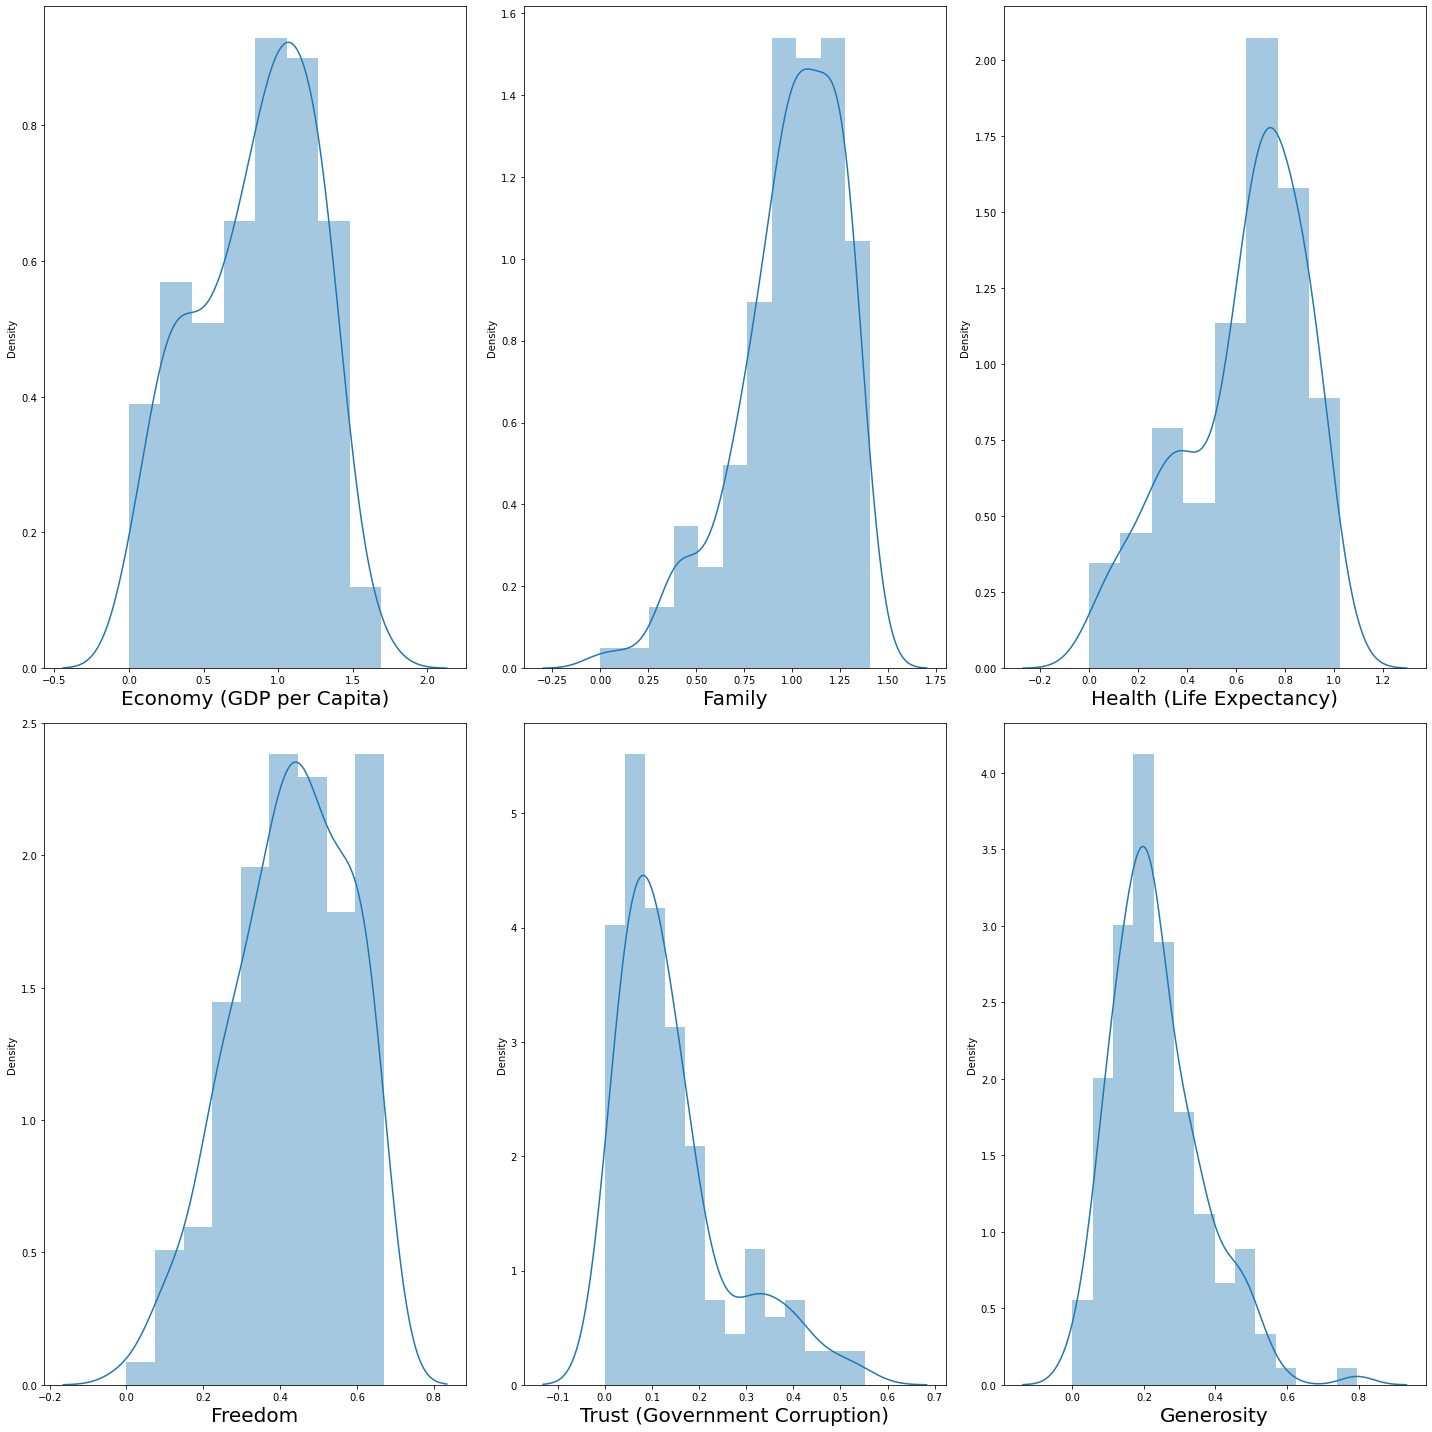

In [9]:
#visualizing the feature

plt.figure(figsize=(20,20))
plotnumber= 1

for column in x:
    if plotnumber <=6:
        ax= plt.subplot(2,3,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.tight_layout()

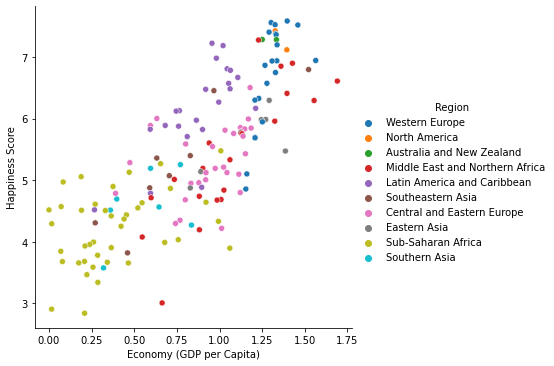

In [44]:
sns.relplot(data=data, x="Economy (GDP per Capita)", y="Happiness Score", hue="Region")

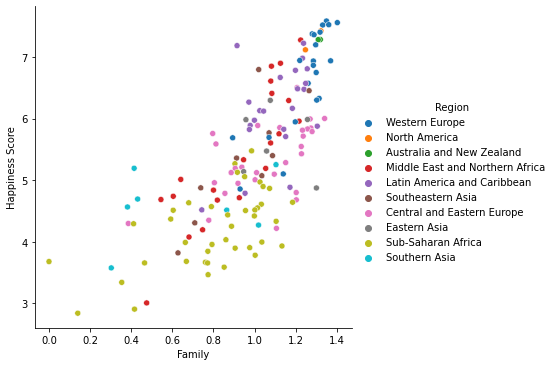

In [46]:
sns.relplot(data=data, x="Family", y="Happiness Score", hue="Region")

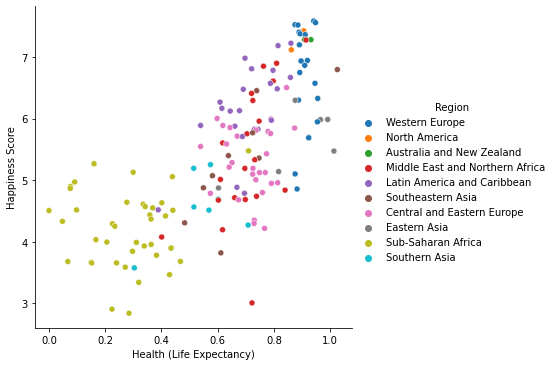

In [47]:
sns.relplot(data=data, x="Health (Life Expectancy)", y="Happiness Score", hue="Region")

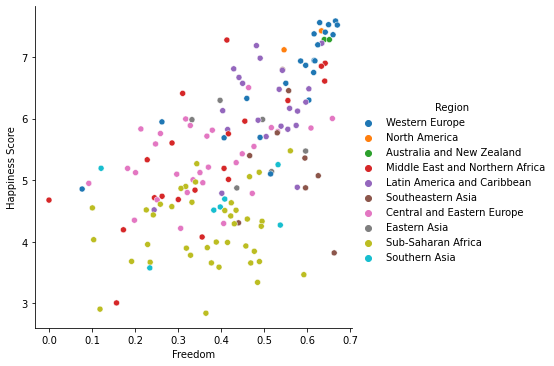

In [48]:
sns.relplot(data=data, x="Freedom", y="Happiness Score", hue="Region")

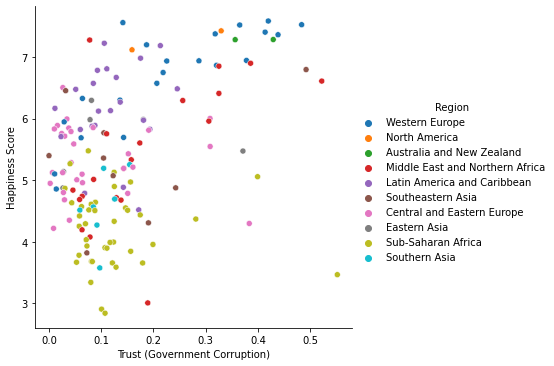

In [49]:
sns.relplot(data=data, x="Trust (Government Corruption)", y="Happiness Score", hue="Region")

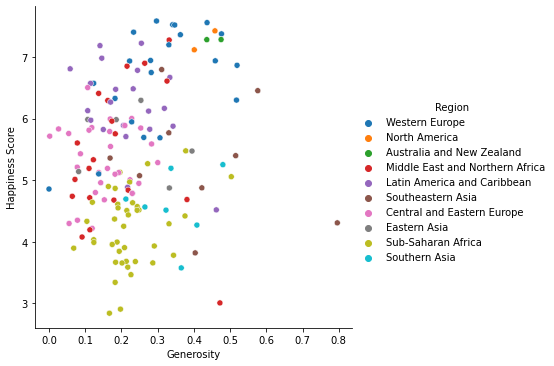

In [50]:
sns.relplot(data=data, x="Generosity", y="Happiness Score", hue="Region")

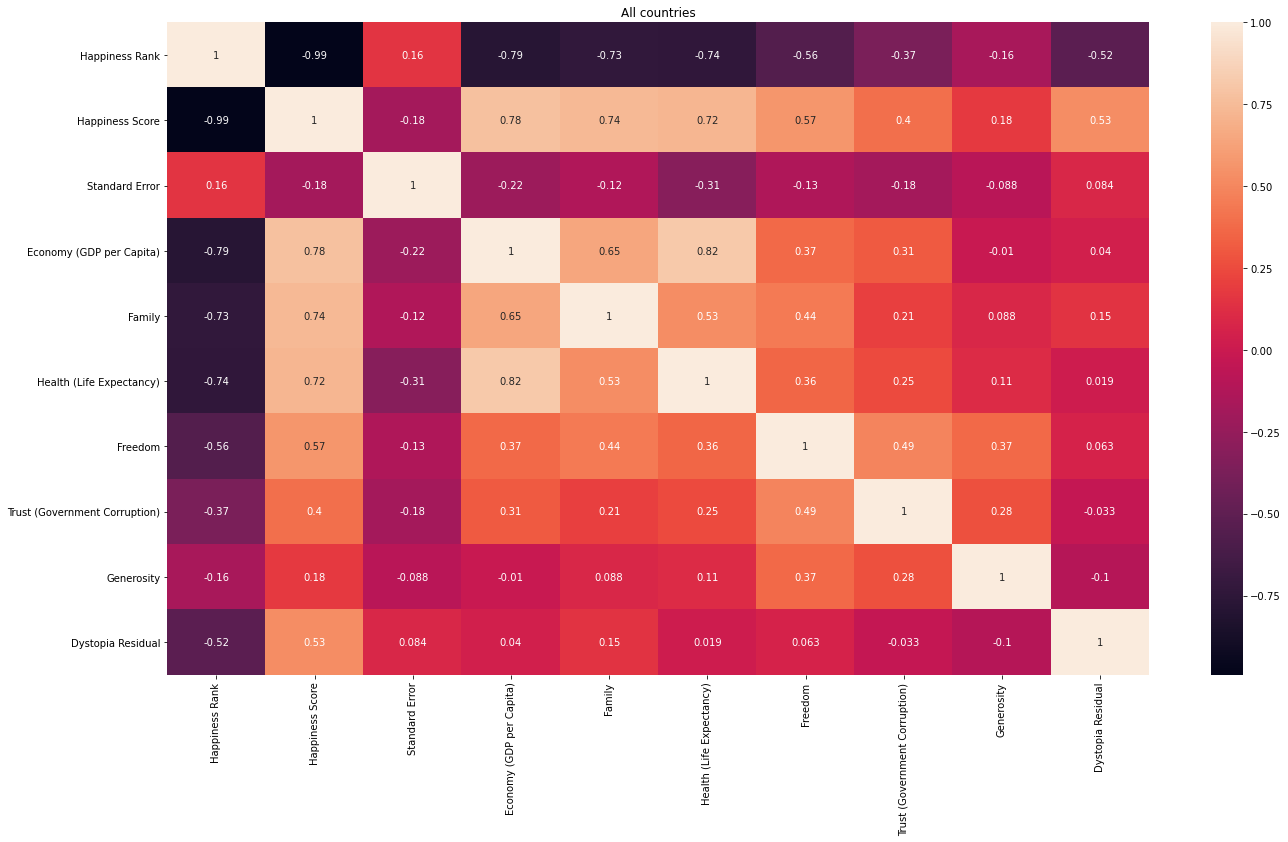

In [53]:
# visualizing the correlation matrix for correlation

corr_mat = data.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title("All countries")
plt.show()


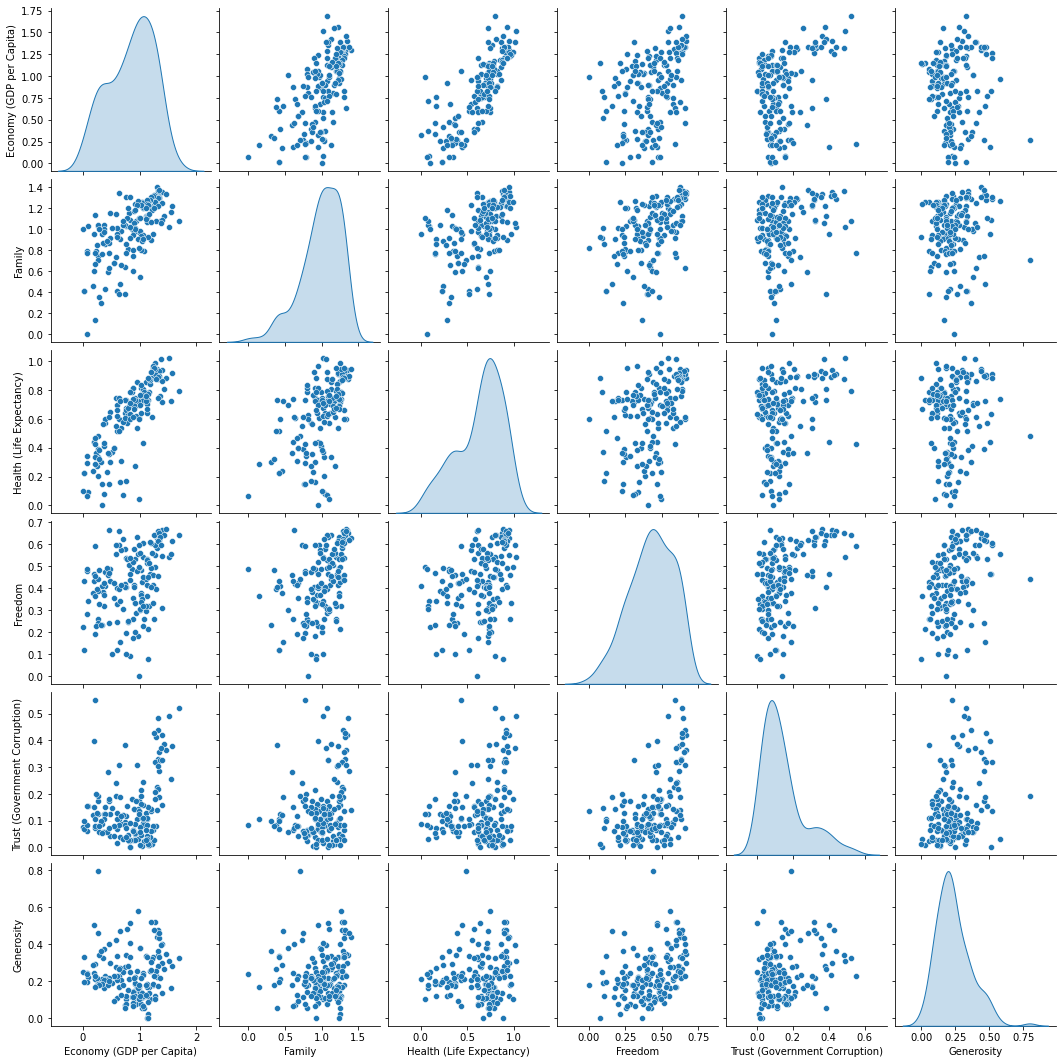

In [55]:
sns.pairplot(x[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity']], diag_kind='kde')

In [56]:
#here the data is in scaled format so we go for fitting to the model
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state= 50)
y_train.head()

48     5.960
148    3.667
41     6.130
7      7.364
97     4.885
Name: Happiness Score, dtype: float64

In [57]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred = reg.predict(x_test)
y_pred

array([6.86722564, 5.71578626, 4.71477426, 4.33194111, 7.19981864,
       5.36024729, 3.98876947, 5.19225012, 6.75010179, 3.78075035,
       6.79779581, 4.89750691, 3.57464003, 6.41115778, 6.9461939 ,
       4.3499738 , 3.0063188 , 5.33248118, 5.84758996, 4.51437263,
       6.26925491, 4.51703373, 5.39870022, 5.09752551, 7.11951997,
       4.30703758, 4.63346234, 5.79052334, 3.93071487, 3.84495032,
       3.68087291, 4.79949198, 3.58680131, 4.78791027, 5.42849116,
       5.12885387, 6.29472762, 6.85294926, 7.52217922, 2.83895715])

In [59]:
# Caliculating the residual matrix
from sklearn.metrics import mean_squared_error,mean_absolute_error

mean_absolute_error(y_test,y_pred)

0.00025051216844528267

In [60]:
mean_squared_error(y_test,y_pred)

8.604003247996274e-08

In [61]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.0002933258128429251

In [62]:
reg.score(x_train,y_train)

0.999999938716887

In [65]:
reg.score(x_test,y_test)

0.9999999432342611

In [67]:
y_pred =reg.predict(x_test)
y_pred

array([6.86722564, 5.71578626, 4.71477426, 4.33194111, 7.19981864,
       5.36024729, 3.98876947, 5.19225012, 6.75010179, 3.78075035,
       6.79779581, 4.89750691, 3.57464003, 6.41115778, 6.9461939 ,
       4.3499738 , 3.0063188 , 5.33248118, 5.84758996, 4.51437263,
       6.26925491, 4.51703373, 5.39870022, 5.09752551, 7.11951997,
       4.30703758, 4.63346234, 5.79052334, 3.93071487, 3.84495032,
       3.68087291, 4.79949198, 3.58680131, 4.78791027, 5.42849116,
       5.12885387, 6.29472762, 6.85294926, 7.52217922, 2.83895715])